In [253]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [254]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [255]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [256]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [257]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [258]:
import pandas as pd

In [259]:
import numpy as np

In [260]:
import seaborn as sns

In [261]:
import plotly.express as px

In [262]:
import re

In [263]:
import matplotlib.pyplot as plt

In [445]:
import warnings
warnings.filterwarnings('ignore')

In [464]:
df = pd.read_csv('adult.csv')


In [465]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [466]:
df.shape

(48842, 15)

In [467]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [468]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [469]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [470]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [471]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [483]:
df['workclass'] = df['workclass'].replace(['Local-gov','State-gov','Federal-gov'], 1)
df['workclass'] = df['workclass'].replace(['Private', 'Self-emp-not-inc','Self-emp-inc','Without-pay','Never-worked'], 0)

In [472]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [473]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [474]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [497]:
df['native-country'] = df['native-country'].replace(['United-States', '?'], 1)
df['native-country'] = df['native-country'].replace(['Mexico', 'Philippines','Germany','Puerto-Rico','Canada','El-Salvador','India','Cuba','England','China','South','Jamaica','Italy','Dominican-Republic','Japan','Guatemala','Poland','Vietnam','Columbia','Haiti','Portugal','Taiwan','Iran','Greece','Nicaragua','Peru','Ecuador','France','Ireland','Hong','Thailand','Cambodia','Trinadad&Tobago','Laos','Yugoslavia','Outlying-US(Guam-USVI-etc)','Scotland','Honduras','Hungary','Holand-Netherlands'], 0)

In [475]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [476]:
df['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [485]:
df['relationship'] = df['relationship'].replace(['Husband','Wife','Own-child','Other-relative'], 1)
df['relationship'] = df['relationship'].replace(['Not-in-family', 'Unmarried'], 0)

In [477]:
df['gender'].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [478]:
df['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [486]:
df['race'] = df['race'].replace(['White'], 1)
df['race'] = df['race'].replace(['Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo','Other'], 0)

In [479]:
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [480]:
df['workclass'] = df['workclass'].str.replace(r'\?', 'Private', regex=True)

In [481]:
df['occupation'] = df['occupation'].str.replace(r'\?', 'Prof-specialty',regex=True)

In [482]:
df['gender'] = df['gender'].replace('Male', 0)
df['gender'] = df['gender'].replace('Female', 1)

In [487]:
df.head(8)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,11th,7,Never-married,Machine-op-inspct,1,0,0,0,0,40,1,<=50K
1,38,0,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,1,1,0,0,0,50,1,<=50K
2,28,1,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,1,1,0,0,0,40,1,>50K
3,44,0,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,1,0,0,7688,0,40,1,>50K
4,18,0,103497,Some-college,10,Never-married,Prof-specialty,1,1,1,0,0,30,1,<=50K
5,34,0,198693,10th,6,Never-married,Other-service,0,1,0,0,0,30,1,<=50K
6,29,0,227026,HS-grad,9,Never-married,Prof-specialty,0,0,0,0,0,40,1,<=50K
7,63,0,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,1,1,0,3103,0,32,1,>50K


In [488]:
df['education'] = df['education'].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th','HS-grad','Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 0)
df['education'] = df['education'].replace(['Bachelors', 'Masters', 'Doctorate'], 1)

In [489]:
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent'],
    1
)

df['marital-status'] = df['marital-status'].replace(['Never-married','not-married','Divorced','Separated','Widowed'],
    0
)

In [490]:
df.income = df.income.replace('<=50K', 0)
df.income = df.income.replace('>50K', 1)

In [491]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,0,7,0,Machine-op-inspct,1,0,0,0,0,40,1,0
1,38,0,89814,0,9,1,Farming-fishing,1,1,0,0,0,50,1,0
2,28,1,336951,0,12,1,Protective-serv,1,1,0,0,0,40,1,1
3,44,0,160323,0,10,1,Machine-op-inspct,1,0,0,7688,0,40,1,1
4,18,0,103497,0,10,0,Prof-specialty,1,1,1,0,0,30,1,0


In [492]:
df['marital-status'].value_counts()

marital-status
0    25798
1    23044
Name: count, dtype: int64

In [493]:
df['education'].value_counts()

education
0    37566
1    11276
Name: count, dtype: int64

In [494]:
df['occupation'].value_counts()

occupation
Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [495]:
df['occupation'] = df['occupation'].replace(['Prof-specialty', 'Exec-managerial', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces', 'Machine-op-inspct'], 1)
df['occupation'] = df['occupation'].replace(['Craft-repair', 'Adm-clerical', 'Sales','Other-service','Transport-moving','Handlers-cleaners','Farming-fishing','Tech-support'], 0)

In [499]:
df.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.073908,-0.076628,0.076395,0.030940,0.318280,0.109995,-0.017887,0.032023,-0.088120,0.077229,0.056944,0.071558,0.013523,0.230369
workclass,0.073908,1.000000,-0.012776,0.143883,0.159290,0.016266,0.121186,-0.032199,-0.061387,0.038532,-0.014055,0.009984,0.001245,0.044346,0.063509
fnlwgt,-0.076628,-0.012776,1.000000,-0.016338,-0.038761,-0.023138,-0.011911,-0.007018,-0.063686,-0.027739,-0.003706,-0.004366,-0.013519,-0.074505,-0.006339
education,0.076395,0.143883,-0.016338,1.000000,0.706556,0.086420,0.302605,-0.014535,0.036785,-0.031293,0.079832,0.070791,0.112027,0.002402,0.285260
educational-num,0.030940,0.159290,-0.038761,0.706556,1.000000,0.073582,0.295507,-0.013952,0.049287,-0.009328,0.125146,0.080972,0.143689,0.128232,0.332613
marital-status,0.318280,0.016266,-0.023138,0.086420,0.073582,1.000000,0.075856,0.667048,0.096622,-0.420845,0.080199,0.073861,0.212059,-0.031112,0.436624
occupation,0.109995,0.121186,-0.011911,0.302605,0.295507,0.075856,1.000000,0.003123,0.012235,0.000808,0.073435,0.049694,0.056119,-0.000070,0.198224
relationship,-0.017887,-0.032199,-0.007018,-0.014535,-0.013952,0.667048,0.003123,1.000000,0.076829,-0.355315,0.039622,0.036309,0.017369,-0.008352,0.264751
race,0.032023,-0.061387,-0.063686,0.036785,0.049287,0.096622,0.012235,0.076829,1.000000,-0.101034,0.014801,0.020572,0.046606,0.178265,0.083710
gender,-0.088120,0.038532,-0.027739,-0.031293,-0.009328,-0.420845,0.000808,-0.355315,-0.101034,1.000000,-0.047094,-0.045480,-0.228560,0.006517,-0.214628


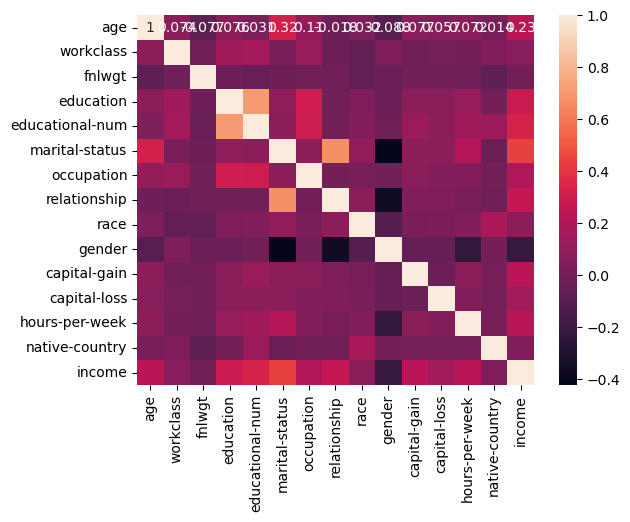

In [500]:
sns.heatmap(df.corr(), annot=True);

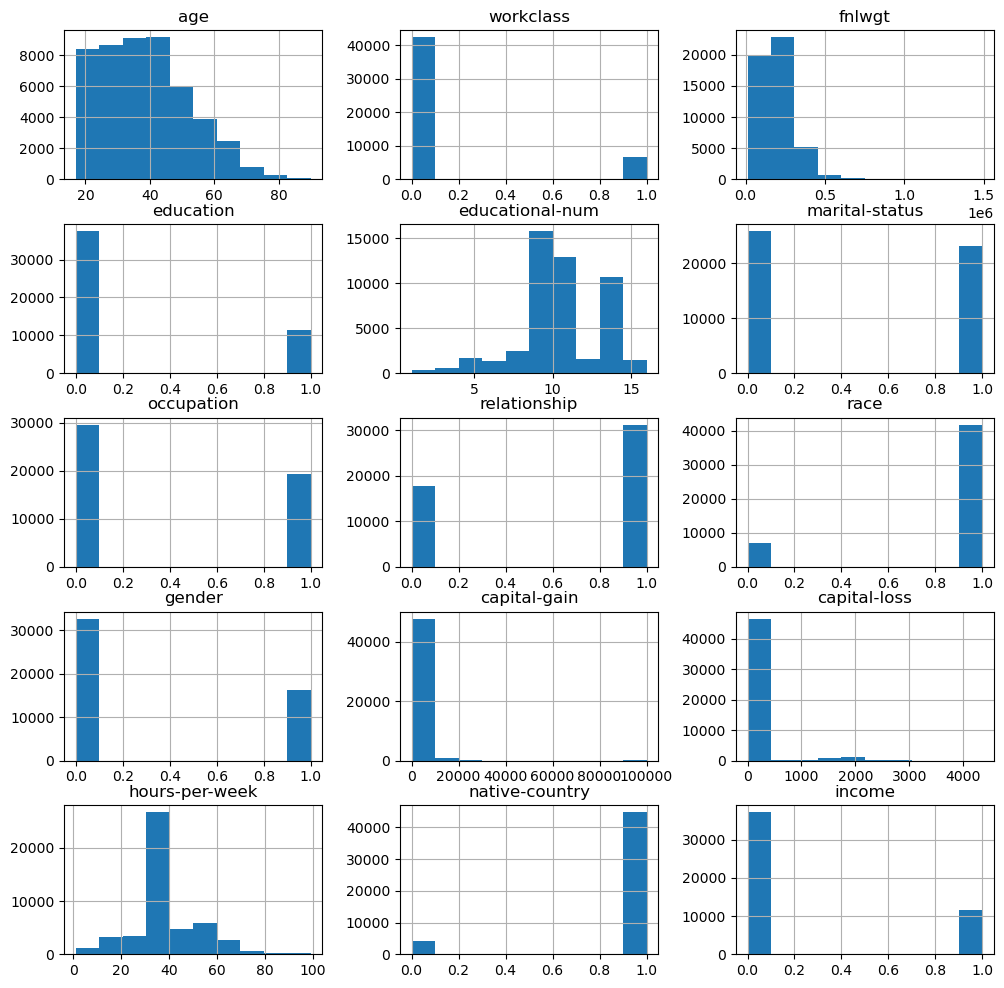

In [501]:
df.hist(figsize=(12, 12), layout=(5,3), sharex=False)  
plt.show()

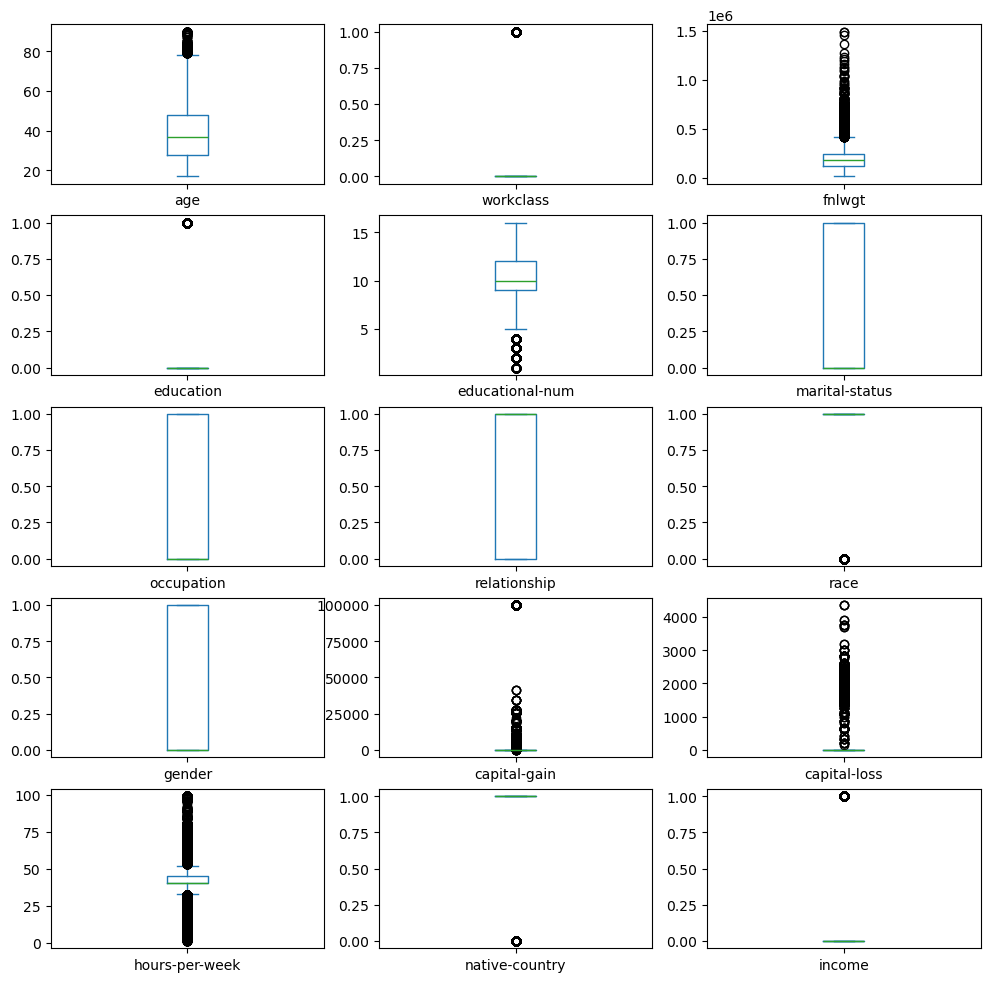

In [502]:
df.plot(kind='box', figsize=(12,12), layout=(5,3), sharex=False, subplots=True);

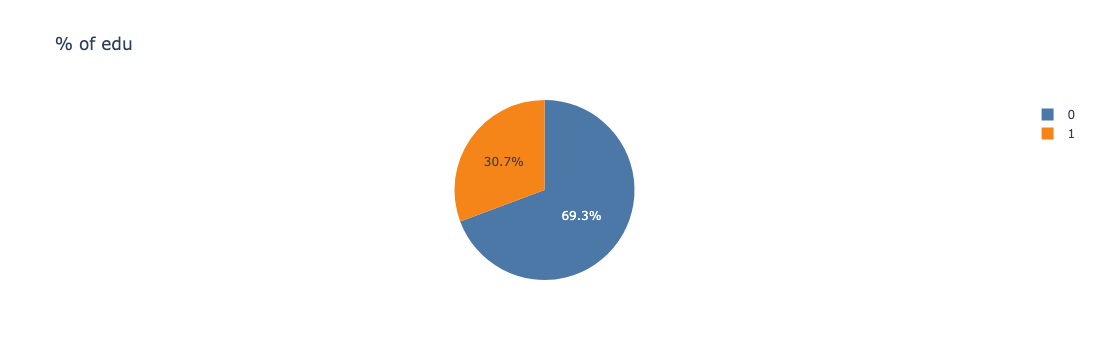

In [503]:
px.pie(df, values='educational-num', names='education', title='% of edu', color_discrete_sequence = px.colors.qualitative.T10)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

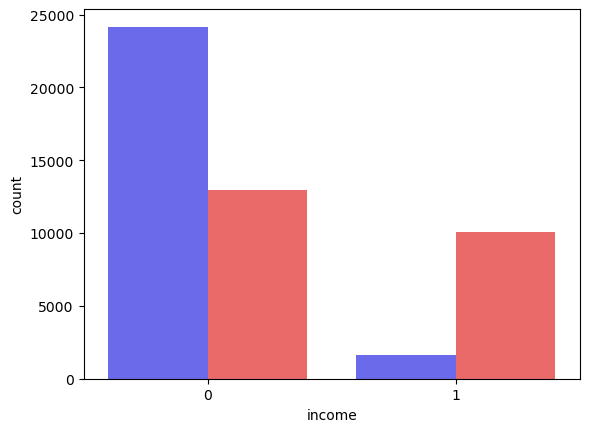

In [537]:
df = df.dropna(subset=['gender', 'education'])  # Drop rows with missing values

sns.countplot(data=df, x='income', hue='marital-status', palette='seismic')





In [505]:
X= df.drop(['income'], axis=1)
y= df['income']

In [506]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [507]:
df1=df.copy()
df=df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,0,7,0,1,1,0,0,0,0,40,1,0
1,38,0,89814,0,9,1,0,1,1,0,0,0,50,1,0
2,28,1,336951,0,12,1,1,1,1,0,0,0,40,1,1
3,44,0,160323,0,10,1,1,1,0,0,7688,0,40,1,1
4,18,0,103497,0,10,0,1,1,1,1,0,0,30,1,0


In [508]:
ss= StandardScaler().fit(df1.drop('income',axis=1))

In [509]:
X= ss.transform(df1.drop('income', axis=1))
y= df['income']

In [510]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=40)

In [511]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [512]:
lr=LogisticRegression()

In [513]:
model=lr.fit(X_train, y_train)
prediction= model.predict(X_test)
print("Acc on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Acc on training data: 0.842
Acc on test data: 0.842


In [514]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Acc on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Acc on training data: 0.842
Acc on test data: 0.842


In [515]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [516]:
print(confusion_matrix(y_test, prediction1))

[[10227   911]
 [ 1334  2181]]


In [517]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11138
           1       0.71      0.62      0.66      3515

    accuracy                           0.85     14653
   macro avg       0.79      0.77      0.78     14653
weighted avg       0.84      0.85      0.84     14653



In [518]:
print('precision =', 10227/(10227+1334))

precision = 0.8846120577804688


In [521]:
print('Recall =', 10227/(10227+911))

Recall = 0.9182079367929611


In [522]:
print('precision =',2181/(2181+911))

precision = 0.7053686934023286


In [523]:
print('recall =', 2181/(2181+1334))

recall = 0.6204836415362731
